In [ ]:
# About Dataset

# Context
# The age of abalone is determined by cutting the shell through the cone, staining it, 
# and counting the number of rings through a microscope -- a boring and time-consuming task. 
# Other measurements, which are easier to obtain, are used to predict the age. Further information, 
# such as weather patterns and location (hence food availability) may be required to solve the problem.

# Original Dataset
# The original dataset can be acessed at https://archive.ics.uci.edu/ml/datasets/abalone.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv('abalone.csv')

df.shape

# (number of rows, number of columns)

(4177, 9)

In [3]:
df.head()

# first 5 rows

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.columns

# all column names

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [5]:
df.describe()

# this dataset is cleaned, all columns have 4177 entries, no missing data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.nunique(axis=0)

# the number of unique values for each variable

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [7]:
df['Sex'].unique()

# it is the only three unique values in sex and it is not quantitative

array(['M', 'F', 'I'], dtype=object)

In [8]:
df.isnull().sum()

# not null values in all columns, the data is clean, except we have to check if there's zero in any columns

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
count0 = (df['Sex'] == 0).sum()
print("count of zero values in the Sex Column: ", count0)

count of zero values in the Sex Column:  0


In [12]:
count3 = (df['Height'] == 0).sum()
print("count of zero values in the Height Column: ", count3)

# found zero values, remove later

count of zero values in the Height Column:  2


In [18]:
# approach using for loop to get sum of zeros in the data frame

# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)
    
# same output, the rows that has height value zero have to be removed

Count of zeros in column  Sex  is :  0
Count of zeros in column  Length  is :  0
Count of zeros in column  Diameter  is :  0
Count of zeros in column  Height  is :  2
Count of zeros in column  Whole weight  is :  0
Count of zeros in column  Shucked weight  is :  0
Count of zeros in column  Viscera weight  is :  0
Count of zeros in column  Shell weight  is :  0
Count of zeros in column  Rings  is :  0


In [19]:
df.loc[(df != 0).any(1)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [20]:
df = df.dropna(axis=0)
df.shape

# drop the rows with nan values (none)

(4177, 9)

In [21]:
df_zero = df[(df[['Height']] == 0).all(axis=1)]
print(df_zero)

# found the two rows with zero height

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Rings  
1257          0.0860        0.1150      8  
3996          0.0285        0.3505      6  


In [22]:
df = df.drop(labels=[1257,3996], axis=0)
df.shape

# two rows removed

(4175, 9)

In [23]:
df_zero = df[(df[['Height']] == 0).all(axis=1)]
print(df_zero)

# check again after removing the two rows

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []


In [24]:
df.describe()

# basic statistics on the columns

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [25]:
df.info()

# check again if any colum has null value and types for each columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


In [26]:
corrM = df.corr()
corrM

# correlation between the columns

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


In [27]:
# eg. finding correlation between length and rings

df['Rings'].corr(df['Length'])

0.5564643758735184

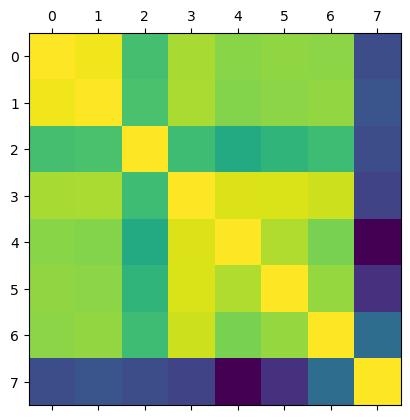

In [28]:
plt.matshow(df.corr())
plt.show()

# correlation matrix plot

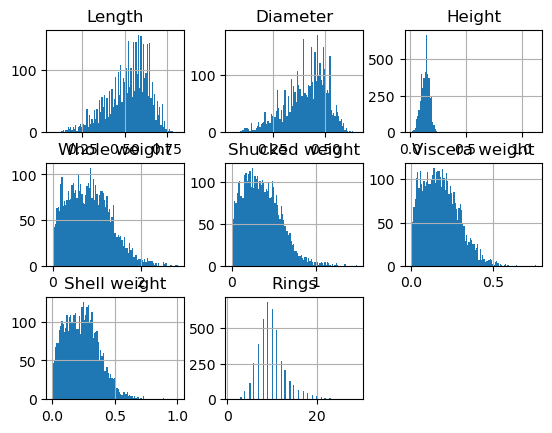

In [29]:
hist = df.hist(bins=100)

# 100 bars in each graph 

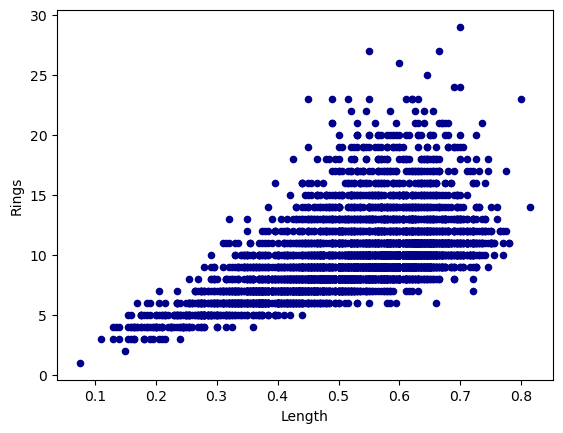

In [30]:
# rings is the target variable.

ax1 = df.plot.scatter(x='Length', y='Rings', c='DarkBlue')

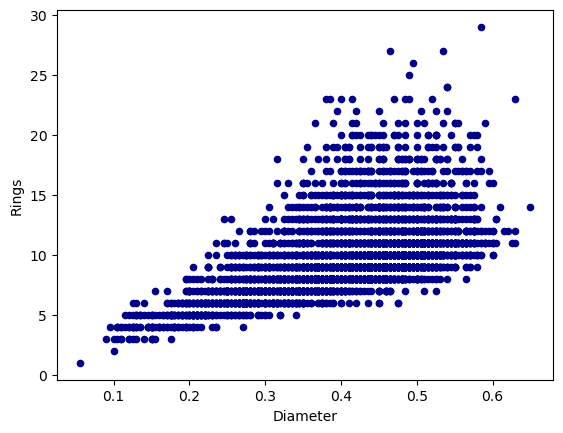

In [31]:
# rings is the target variable.

ax1 = df.plot.scatter(x='Diameter', y='Rings', c='DarkBlue')

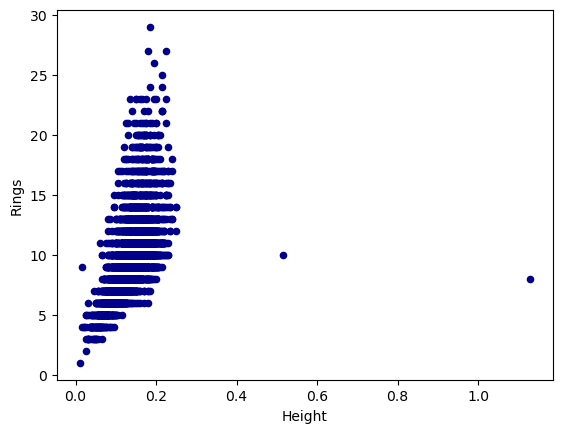

In [32]:
# rings is the target variable.

ax1 = df.plot.scatter(x='Height', y='Rings', c='DarkBlue')

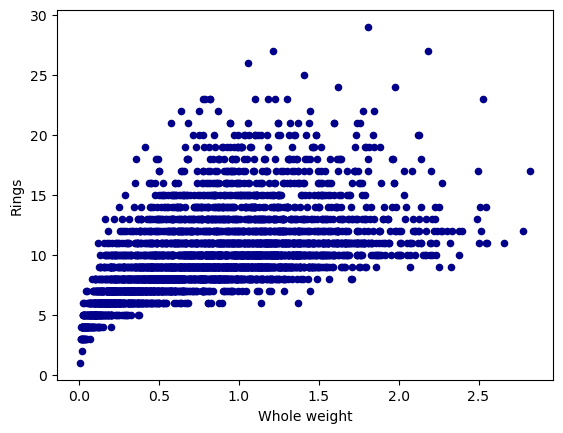

In [33]:
# rings is the target variable.

ax1 = df.plot.scatter(x='Whole weight', y='Rings', c='DarkBlue')

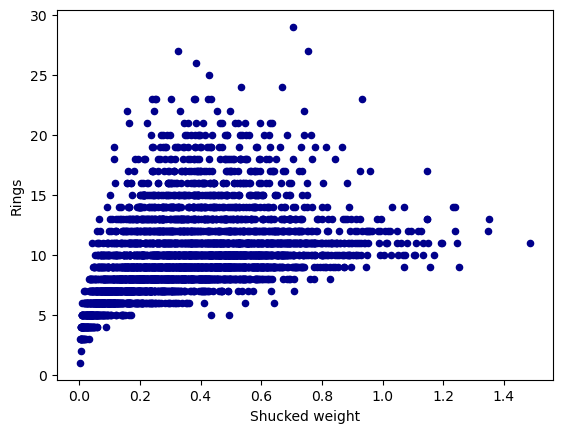

In [34]:
# rings is the target variable.

ax1 = df.plot.scatter(x='Shucked weight', y='Rings', c='DarkBlue')

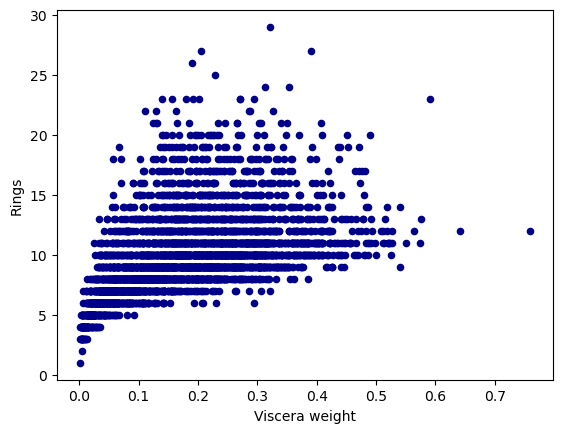

In [35]:
# rings is the target variable.

ax1 = df.plot.scatter(x='Viscera weight', y='Rings', c='DarkBlue')

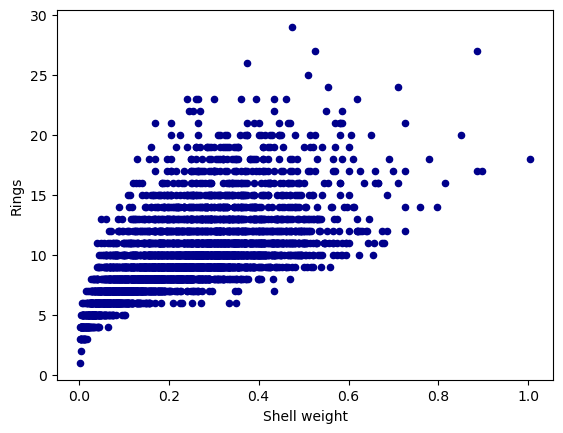

In [36]:
# rings is the target variable.

ax1 = df.plot.scatter(x='Shell weight', y='Rings', c='DarkBlue')